In [95]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn import datasets
from scipy.spatial.distance import cdist
import numpy as np

In [96]:
# Loading Dataset and describing the dataset
iris = datasets.load_iris()
iris.data.shape
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [128]:
# As Iris Dataset is taken from the dataset it already has the target variable - We are trying to acheive the same
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [99]:
#  To perform KMeans first we need to know the total number of cluster, we are using Elbow Technique

# Creating an empty list
disortions = []

# We are going to perform the operation from 1 - 10 in a loop and take the desired value from the elbow Technique

# Taking range from 1 - 10
K = range(1,10)

In [100]:
# Creating a new Data Frame from the loaded Iris Dataset and changing the labels
iris_df = pd.DataFrame(iris.data)
iris_df.columns = ['sepal_length','sepal_width','petal_length','petal_width']

In [102]:
# Assining the values to X variable and converting into an array
X = iris_df.loc[:,['petal_length','petal_width']]
X = np.array(X)

In [103]:
# Performing the operation in a loop so that it take the disortions using all the values from the Range 

for i in K:
    kmeans_model = KMeans(n_clusters = i)
    kmeans_model.fit(X)
    disortions.append(sum(np.min(cdist(X,kmeans_model.cluster_centers_, 'euclidean'),axis = 1))/X.shape[0])

C:\Users\krish\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [104]:
disortions

[1.707364436891335,
 0.583920126422277,
 0.36876646966749166,
 0.2992242581050885,
 0.26508349289751987,
 0.23283408287736876,
 0.21179831353411918,
 0.19858135818338693,
 0.18410484384588674]

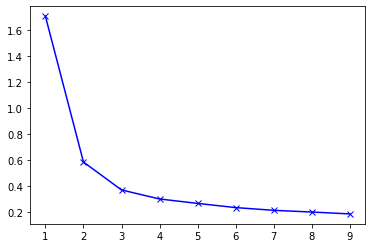

In [105]:
# Plotting all the values of disortions
plt.plot(K,disortions,'bx-')

Clearly from the plot K = 3, from the elbow technique

In [106]:
# As we now know the number of cluster, we are creating and fitting the model with the Number of cluster and random state
clustering = KMeans(n_clusters=3,random_state=1)
clustering.fit(x)
# After using the KMeans Clusting we have Target variable
clustering.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

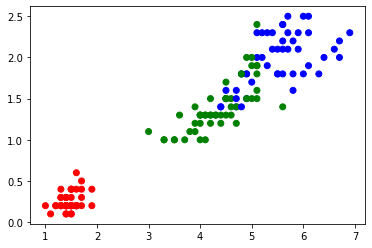

In [132]:
# Ploting the preticted values from the KMeans clustering technique
color2 = np.array(['Green','Red','Blue'])
plt.scatter(x = iris_df.petal_length,y = iris_df.petal_width, c=color2[clustering.labels_])

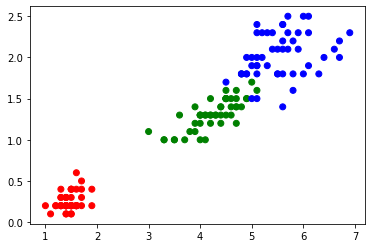

In [133]:
# Ploting the actual target from the Iris Dataset
color = np.array(['Red','Green','Blue'])
plt.scatter(x = iris_df.petal_length,y = iris_df.petal_width, c=color[iris.target])